In [121]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import time

In [122]:
# (a) K-means clustering using scikit-learn
def kmeans_clustering(X, n_clusters):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_


    # Calculate the Silhouette Score
    silhouette = silhouette_score(X, clusters)
    # Calculate the Sum of Squared Errors (SSE)
    squared_distances = np.array([np.sum((X[clusters == i] - cluster_centers[i]) ** 2) for i in range(n_clusters)])
    sse = np.sum(squared_distances)

    # Calculate the total time taken for clustering
    end_time = time.time()
    time_taken = end_time - start_time

    metrics = [silhouette, sse, time_taken]

    return clusters, cluster_centers, metrics

In [123]:
# (b) Hierarchical clustering using SciPy
def scipy_hierarchical_clustering(X, max_d):
    start_time = time.time()
    # Cluster using SciPy's linkage function
    row_clusters = linkage(X.data, method='complete', metric='euclidean')

    # Retrieve the final clusters
    clusters = fcluster(row_clusters, max_d, criterion='distance')
    silhouette = silhouette_score(X.data, clusters)
    centroids = np.array([X.data[clusters == i].mean(axis=0) for i in range(1, len(np.unique(clusters))+1)])
    cluster_centers = centroids
    # Calculate the Sum of Squared Errors (SSE)
    squared_distances = np.array([np.sum((X.data[clusters == i] - centroids[i-1]) ** 2) for i in range(1, len(np.unique(clusters))+1)])
    sse = np.sum(squared_distances)

    # Calculate the total time taken for clustering
    end_time = time.time()
    time_taken = end_time - start_time

    metrics = [silhouette, sse, time_taken]

    return clusters, cluster_centers, metrics, row_clusters

In [124]:
# (c) Hierarchical clustering using scikit-learn
def sklearn_hierarchical_clustering(X, n_clusters):
    start_time = time.time()
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    clusters = agglomerative.fit_predict(X)

    # Calculate the Silhouette Score
    silhouette = silhouette_score(X, clusters)
    # Calculate cluster centroids
    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(n_clusters)])
    cluster_centers = centroids
    # Calculate the Sum of Squared Errors (SSE)
    squared_distances = np.array([np.sum((X[clusters == i] - centroids[i]) ** 2) for i in range(n_clusters)])
    sse = np.sum(squared_distances)

    # Calculate the total time taken for clustering
    end_time = time.time()
    time_taken = end_time - start_time

    metrics = [silhouette, sse, time_taken]

    return clusters, cluster_centers, metrics

In [125]:
# Task 2: Elbow Approach for K-means

def elbow_method(X, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal K')
    plt.show()

In [126]:
# Task 3: Dataset Utilization

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

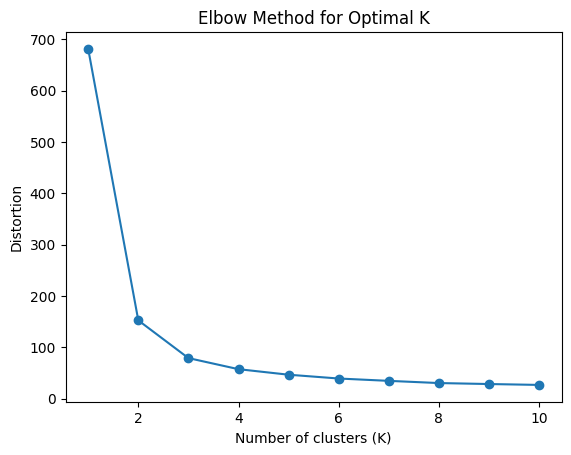

In [127]:
# Elbow Method
elbow_method(X_iris, 10)

In [128]:
# Task 4: Clustering Analysis
clusters, cluster_centers, metrics = kmeans_clustering(X_iris, 3)

# Print the results
print(f"Silhouette Score: {metrics[0]}")
print(f"SSE: {metrics[1]}")
print(f"Time taken: {metrics[2]} seconds")

Silhouette Score: 0.5528190123564095
SSE: 78.85144142614601
Time taken: 0.034775495529174805 seconds


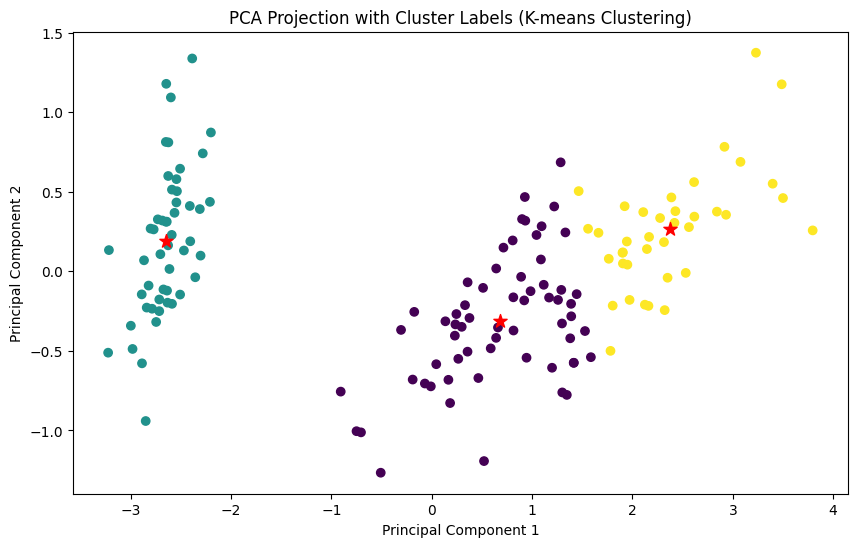

In [129]:
from sklearn.decomposition import PCA

# Project the data using PCA with two principal components
pca = PCA(n_components=2)
projected_data = pca.fit_transform(X_iris)

# Draw a scatter plot with cluster IDs as labels
cluster_labels = clusters
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='*', s=100, label='Cluster Centers')
plt.title("PCA Projection with Cluster Labels (K-means Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [130]:
# Task 4: Clustering Analysis
sklearn_hierarchical_clusters, sklearn_hierarchical_cluster_centers, sklearn_hierarchical_cluster_metrics = sklearn_hierarchical_clustering(X_iris, 3)

# Print the results
print(f"Silhouette Score: {sklearn_hierarchical_cluster_metrics[0]}")
print(f"SSE: {sklearn_hierarchical_cluster_metrics[1]}")
print(f"Time taken: {sklearn_hierarchical_cluster_metrics[2]} seconds")

Silhouette Score: 0.5543236611296419
SSE: 79.29712847222223
Time taken: 0.003103494644165039 seconds


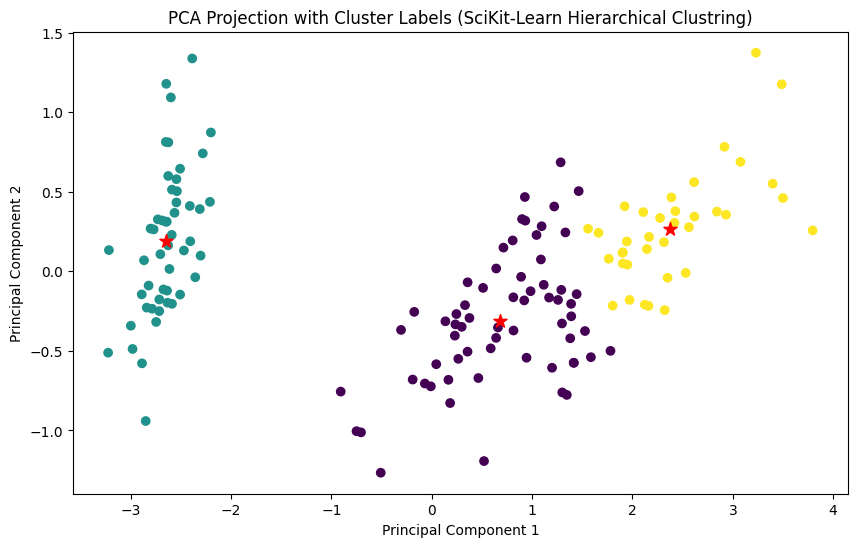

In [131]:
from sklearn.decomposition import PCA

# Project the data using PCA with two principal components
pca = PCA(n_components=2)
projected_data = pca.fit_transform(X_iris)

# Draw a scatter plot with cluster IDs as labels
cluster_labels = sklearn_hierarchical_clusters
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='*', s=100, label='Cluster Centers')
plt.title("PCA Projection with Cluster Labels (SciKit-Learn Hierarchical Clustring)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [132]:
clusters_scipy, cluster_centers_scipy, metics_scipy, row_clusters = scipy_hierarchical_clustering(iris, 3)

# Print the results
print(f"Silhouette Score: {metics_scipy[0]}")
print(f"SSE: {metics_scipy[1]}")
print(f"Time taken: {metics_scipy[2]} seconds")

Silhouette Score: 0.4998128294171971
SSE: 60.972952380952385
Time taken: 0.002014636993408203 seconds


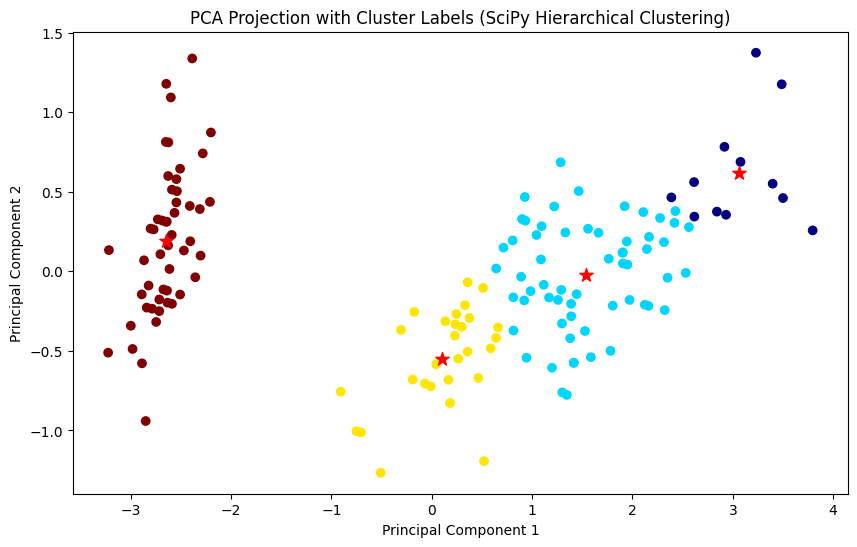

In [133]:
from sklearn.decomposition import PCA

# Project the data using PCA with two principal components
pca = PCA(n_components=2)
projected_data = pca.fit_transform(X_iris)

# Draw a scatter plot with cluster IDs as labels
cluster_labels = clusters_scipy
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels, cmap='jet')
cluster_centers_pca = pca.transform(cluster_centers_scipy)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='*', s=100, label='Cluster Centers')
plt.title("PCA Projection with Cluster Labels (SciPy Hierarchical Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

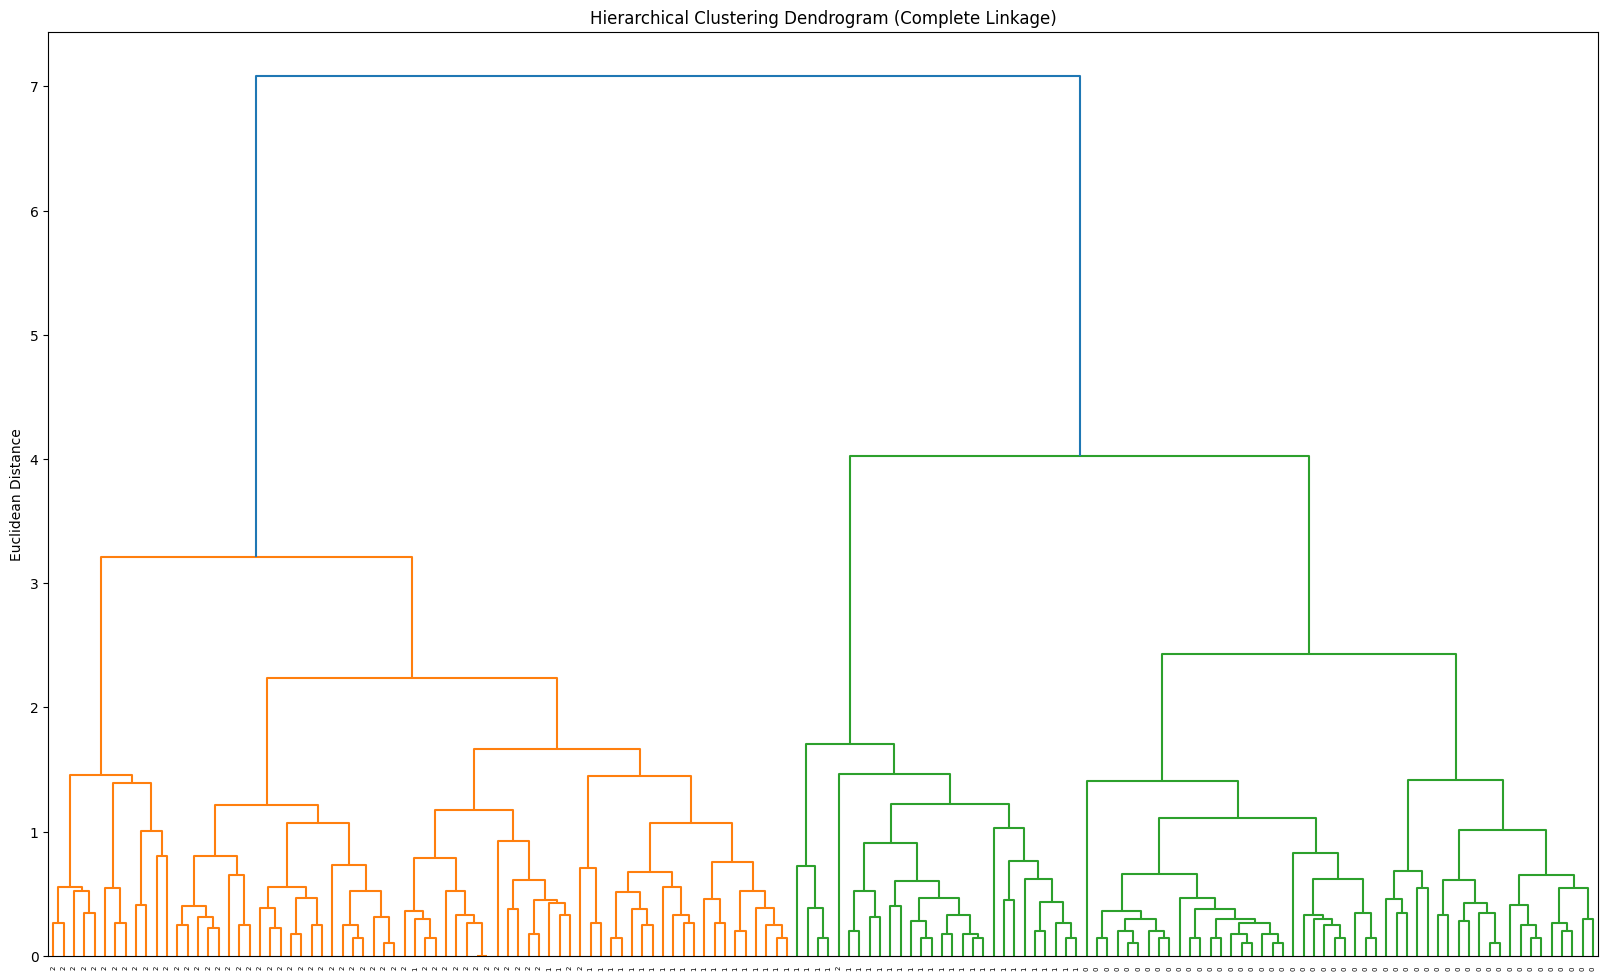

In [134]:
# Visualize the dendrogram
plt.figure(figsize=(20, 12))
dendrogram(row_clusters, labels=iris.target)
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.show()

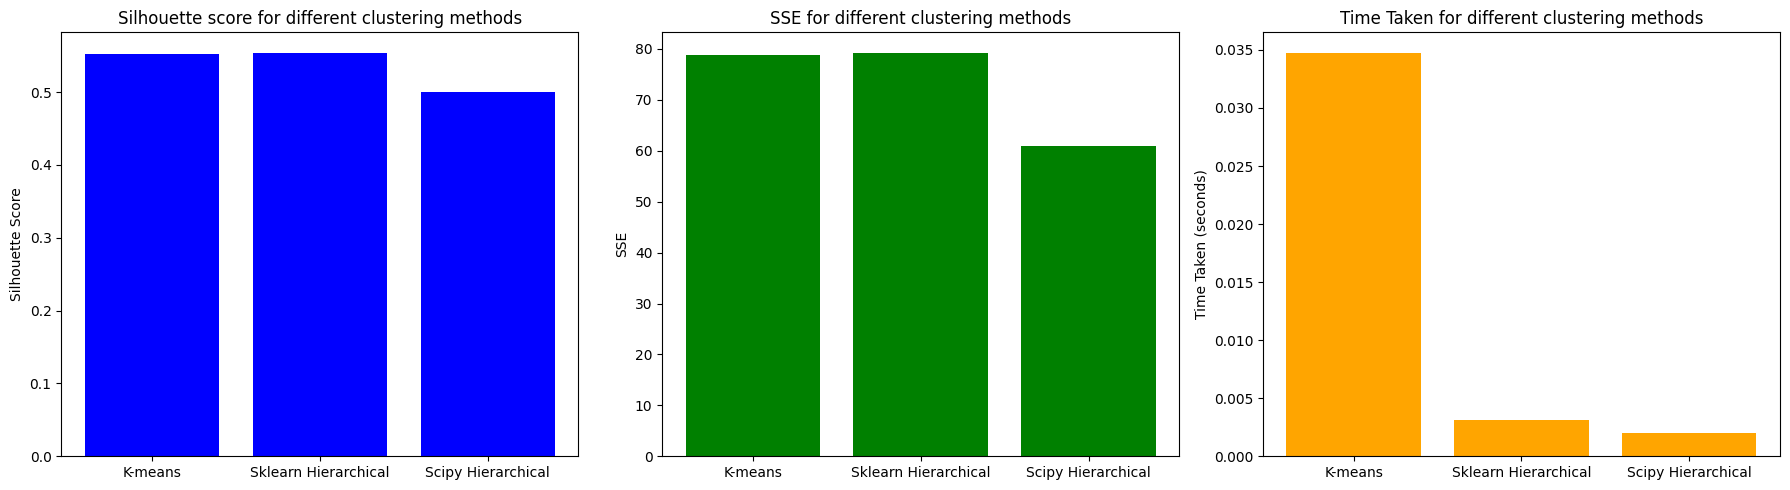

In [135]:
silhouette_all = [metrics[0], sklearn_hierarchical_cluster_metrics[0], metics_scipy[0]]
sse_all = [metrics[1], sklearn_hierarchical_cluster_metrics[1], metics_scipy[1]]
time_all = [metrics[2], sklearn_hierarchical_cluster_metrics[2], metics_scipy[2]]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods = ["K-means", "Sklearn Hierarchical", "Scipy Hierarchical"]
# Silhouette Score
axes[0].bar(methods, silhouette_all, color='blue')
axes[0].set_title('Silhouette score for different clustering methods')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(methods, sse_all, color='green')
axes[1].set_title('SSE for different clustering methods')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(methods, time_all, color='orange')
axes[2].set_title('Time Taken for different clustering methods')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

In [140]:
import matplotlib.pyplot as plt

def calculate_metrics_for_clusters(X, max_clusters, method):
    silhouette_scores = []
    sse_values = []
    times_taken = []

    if method == 'scipy_hierarchical':
        max_d = 1
        while max_d <= max_clusters:
            clusters, cluster_centers, metrics, row_clusters = scipy_hierarchical_clustering(X, max_d)
            max_d+=0.5

            silhouette_score, sse, time_taken = metrics

            silhouette_scores.append(silhouette_score)
            sse_values.append(sse)
            times_taken.append(time_taken)
    else:
        for n_clusters in range(2, max_clusters + 1):
            # Perform hierarchical clustering
            if method == 'kmeans':
                clusters, cluster_centers, metrics = kmeans_clustering(X, n_clusters)
            elif method == 'sklearn_hierarchical':
                clusters, cluster_centers, metrics = sklearn_hierarchical_clustering(X, n_clusters)
            
            silhouette_score, sse, time_taken = metrics

            silhouette_scores.append(silhouette_score)
            sse_values.append(sse)
            times_taken.append(time_taken)
    print(silhouette_scores)
    print(sse_values)
    print(times_taken)
    return silhouette_scores, sse_values, times_taken

[0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566, 0.36483400396700255, 0.349748162116121, 0.35745369258527165, 0.33944886363936994, 0.2973144972185978]
[152.34795176035792, 78.85144142614601, 57.22847321428571, 46.446182051282044, 39.03998724608725, 34.469495898838005, 30.186555194805198, 28.28937085137085, 26.552373141564317]
[0.0355229377746582, 0.036737680435180664, 0.03300786018371582, 0.03924393653869629, 0.04085803031921387, 0.0648186206817627, 0.05417442321777344, 0.06550097465515137, 0.0636446475982666]


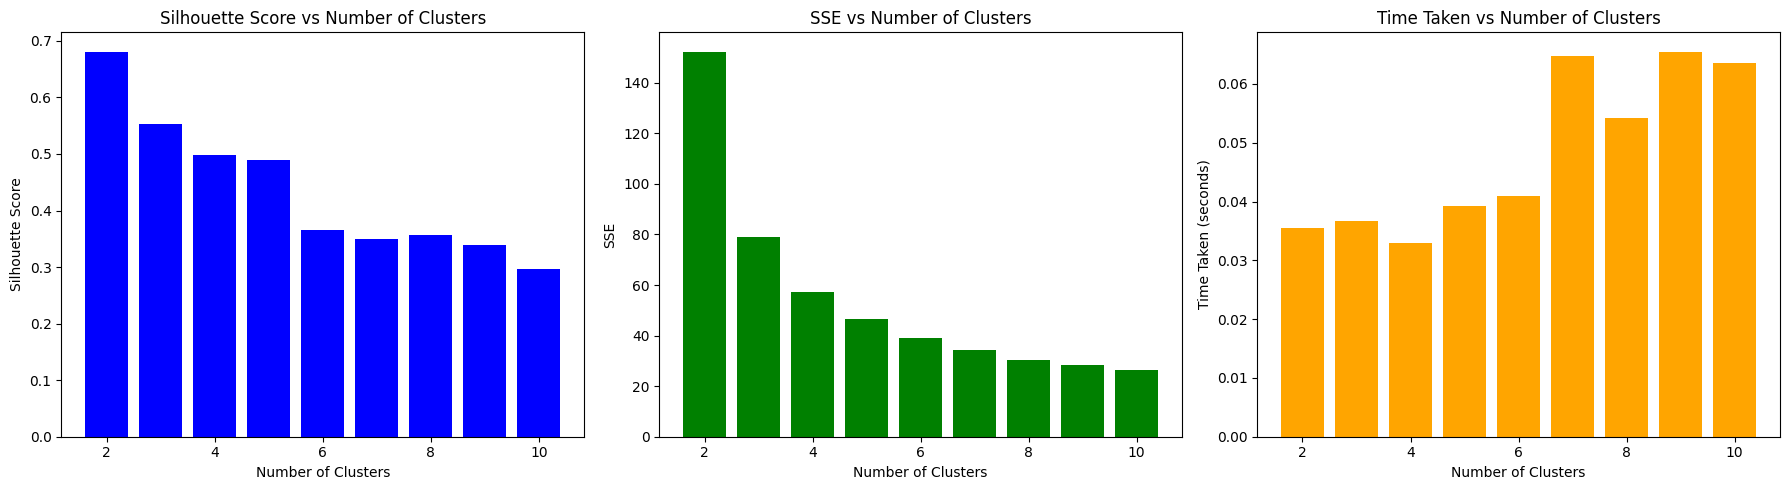

In [141]:
# Calculate metrics for clusters 1 to 10
max_clusters = 10
silhouette_scores, sse_values, times_taken = calculate_metrics_for_clusters(X_iris, max_clusters, 'kmeans')

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(range(2, max_clusters + 1), silhouette_scores, color='blue')
axes[0].set_title('Silhouette Score vs Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(range(2, max_clusters + 1), sse_values, color='green')
axes[1].set_title('SSE vs Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(range(2, max_clusters + 1), times_taken, color='orange')
axes[2].set_title('Time Taken vs Number of Clusters')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

[0.6867350732769777, 0.5543236611296419, 0.4889670857554692, 0.48438258927905953, 0.3592376192603081, 0.34220719366205, 0.3435906599119536, 0.3304886352874657, 0.29253860430301265]
[154.947, 79.29712847222223, 58.820924651372025, 47.07078576248314, 39.743792330627635, 35.62701353581451, 31.667887661688635, 29.55918838632632, 27.718382098293862]
[0.004983186721801758, 0.0030007362365722656, 0.0019958019256591797, 0.003000497817993164, 0.0034673213958740234, 0.0040013790130615234, 0.0029947757720947266, 0.002999544143676758, 0.0019996166229248047]


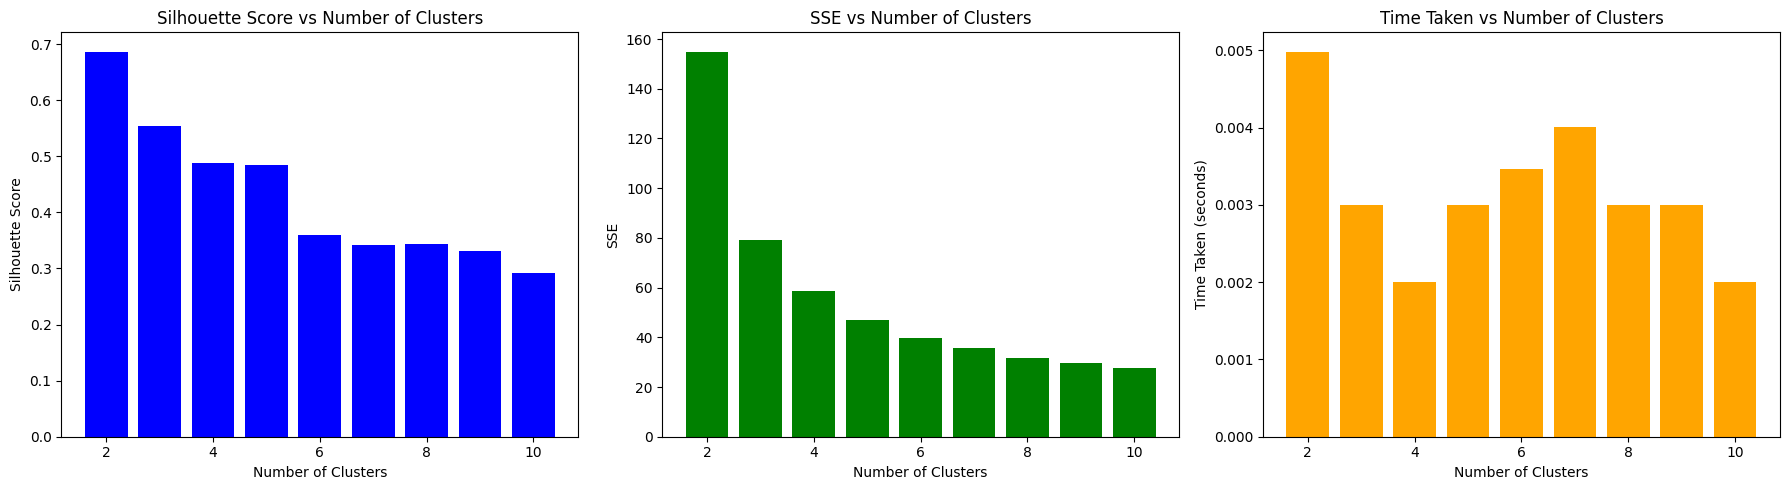

In [142]:
# Calculate metrics for clusters 1 to 10
max_clusters = 10
silhouette_scores, sse_values, times_taken = calculate_metrics_for_clusters(X_iris, max_clusters, 'sklearn_hierarchical')

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(range(2, max_clusters + 1), silhouette_scores, color='blue')
axes[0].set_title('Silhouette Score vs Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(range(2, max_clusters + 1), sse_values, color='green')
axes[1].set_title('SSE vs Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(range(2, max_clusters + 1), times_taken, color='orange')
axes[2].set_title('Time Taken vs Number of Clusters')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

[0.25544483035757687, 0.324025026571425, 0.33820313796202034, 0.4998128294171971, 0.4998128294171971, 0.5135953221192214, 0.5135953221192214, 0.5159829508133176, 0.5159829508133176]
[13.70930618212197, 31.774898426455223, 40.51982581846466, 60.972952380952385, 60.972952380952385, 89.52500793650793, 89.52500793650793, 235.15305555555557, 235.15305555555557]
[0.003000497817993164, 0.0029973983764648438, 0.0010018348693847656, 0.002325773239135742, 0.003373861312866211, 0.002004861831665039, 0.0020012855529785156, 0.0030145645141601562, 0.0019922256469726562]


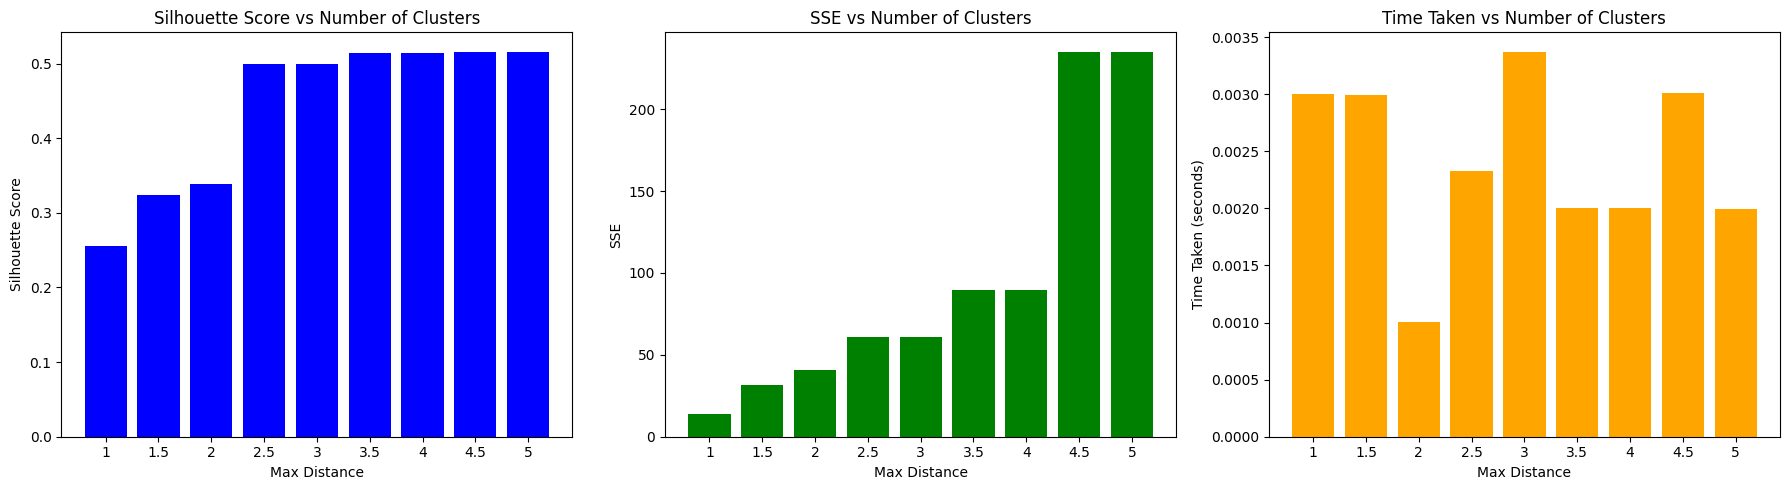

In [143]:
# Calculate metrics for clusters 1 to 10
max_d = 5
silhouette_scores, sse_values, times_taken = calculate_metrics_for_clusters(iris, max_d, 'scipy_hierarchical')

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# range_ = []
# for i in range(1, max_d+1):
#     range_.append(i)
#     range_.append(i+0.5)

range_ = ['1',"1.5",'2','2.5','3','3.5','4','4.5','5']

#range_.pop()

# Silhouette Score
axes[0].bar(range_, silhouette_scores, color='blue')
axes[0].set_title('Silhouette Score vs Number of Clusters')
axes[0].set_xlabel('Max Distance')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(range_, sse_values, color='green')
axes[1].set_title('SSE vs Number of Clusters')
axes[1].set_xlabel('Max Distance')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(range_, times_taken, color='orange')
axes[2].set_title('Time Taken vs Number of Clusters')
axes[2].set_xlabel('Max Distance')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X_mnist = mnist.data
y_mnist = mnist.target

In [157]:
# Define the number of samples per class
samples_per_class = 200

# Initialize lists to store indices of samples for each class
class_indices = []

# Iterate over each class label
for label in np.unique(y_mnist):
    # Get indices of samples with the current class label
    indices = np.where(y_mnist == label)[0]
    # Randomly select 'samples_per_class' samples for the current class
    selected_indices = np.random.choice(indices, samples_per_class, replace=False)
    # Add selected indices to the list
    class_indices.extend(selected_indices)


# Select the subset of data and labels based on the selected indices
X_subset_mnist = np.array(X_mnist.iloc[class_indices])
y_subset_mnist = y_mnist.iloc[class_indices]

# Print the shape of the subset
print("Subset X shape:", X_subset_mnist.shape)
print("Subset y shape:", y_subset_mnist.shape)

Subset X shape: (2000, 784)
Subset y shape: (2000,)


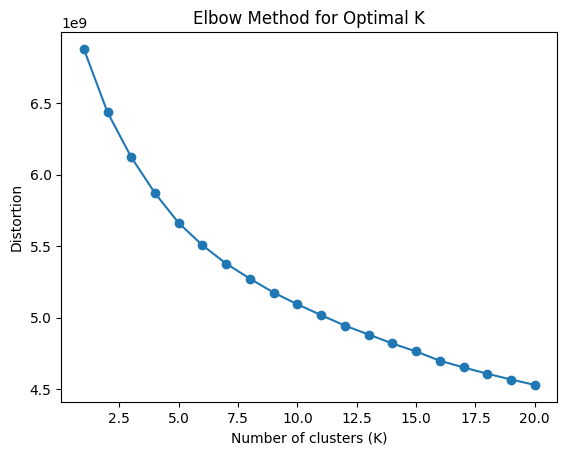

In [ ]:
elbow_method(X_subset_mnist, 20)

In [ ]:
# Task 4: Clustering Analysis
clusters, cluster_centers, metrics = kmeans_clustering(X_subset_mnist, 10)

# Print the results
print(f"Silhouette Score: {metrics[0]}")
print(f"SSE: {metrics[1]}")
print(f"Time taken: {metrics[2]} seconds")

Silhouette Score: 0.061299302240832465
SSE: 5093778833.336929
Time taken: 1.429243564605713 seconds


[0.0824663659177325, 0.05972575727736014, 0.061888628440140564, 0.06741201509625536, 0.06386444474987746, 0.0704771411843997, 0.07277629728591581, 0.05854830384197216, 0.061299302240832465]
[6434511488.909285, 6121067657.813791, 5869784348.02771, 5661548766.206413, 5506028292.908951, 5377657917.598744, 5272995697.278269, 5175403906.786496, 5093778833.336929]
[0.9055023193359375, 1.0469574928283691, 1.1548771858215332, 0.8675494194030762, 0.9244143962860107, 0.9635045528411865, 1.1136353015899658, 0.8865704536437988, 1.3343114852905273]


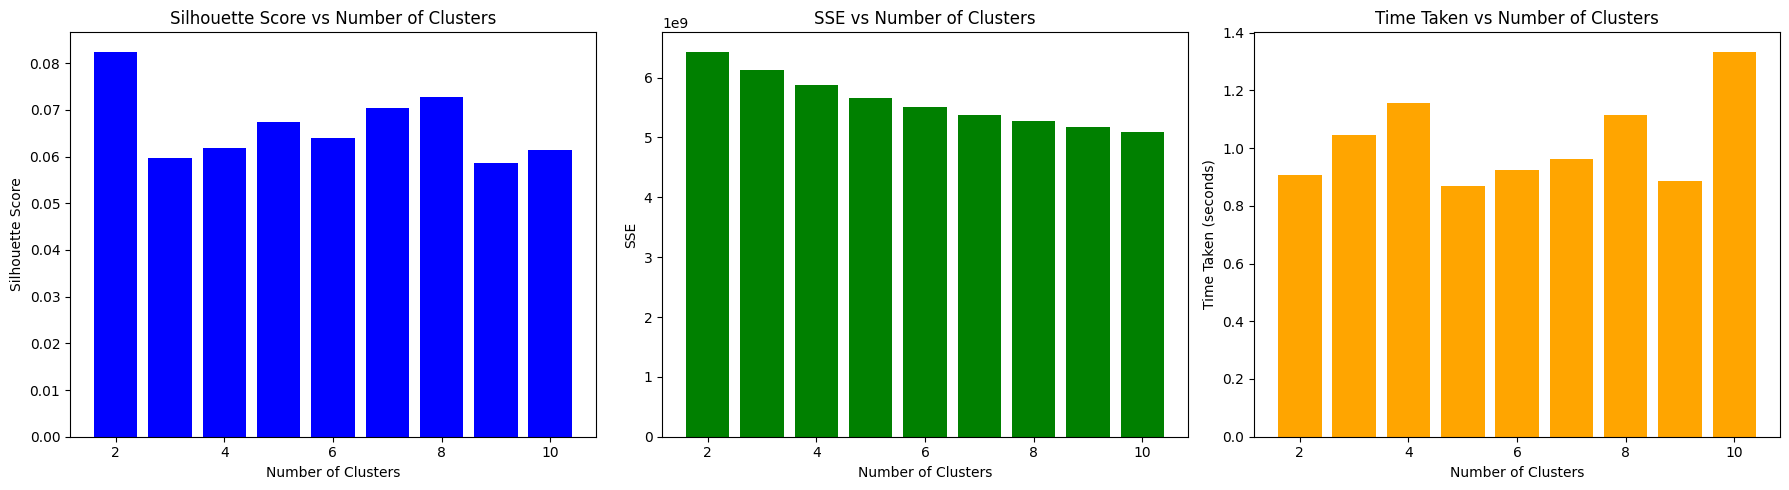

In [148]:
# Calculate metrics for clusters 1 to 10
max_clusters = 10
silhouette_scores, sse_values, times_taken = calculate_metrics_for_clusters(X_subset_mnist, max_clusters, 'kmeans')

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(range(2, max_clusters + 1), silhouette_scores, color='blue')
axes[0].set_title('Silhouette Score vs Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(range(2, max_clusters + 1), sse_values, color='green')
axes[1].set_title('SSE vs Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(range(2, max_clusters + 1), times_taken, color='orange')
axes[2].set_title('Time Taken vs Number of Clusters')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

In [ ]:
# Task 4: Clustering Analysis
clusters, cluster_centers, metrics = sklearn_hierarchical_clustering(X_subset_mnist, 10)

# Print the results
print(f"Silhouette Score: {metrics[0]}")
print(f"SSE: {metrics[1]}")
print(f"Time taken: {metrics[2]} seconds")

Silhouette Score: 0.02959362287028824
SSE: 5298373568.318553
Time taken: 0.8439462184906006 seconds


[0.05563728394194534, 0.029620115097723363, 0.041954371268415426, 0.05298429142646167, 0.03274841744658946, 0.03498621155547672, 0.04135163932868906, 0.028553207077488443, 0.02959362287028824]
[6539024329.424632, 6295038107.035302, 6061871391.21063, 5856351685.681204, 5698297441.484599, 5575841600.17044, 5464757993.061706, 5375940134.727076, 5298373568.318553]
[0.8885190486907959, 1.1186292171478271, 1.0982816219329834, 1.0620954036712646, 0.9302732944488525, 0.9889693260192871, 1.107128381729126, 0.9175112247467041, 0.8073523044586182]


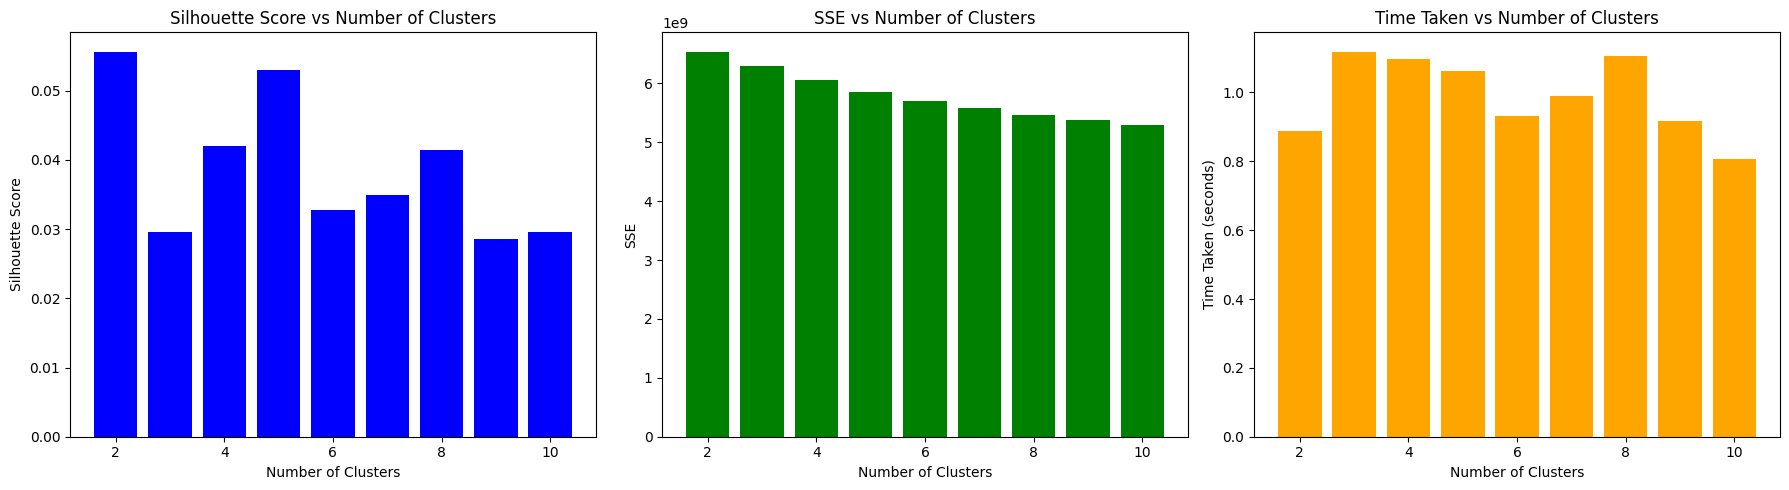

In [149]:
# Calculate metrics for clusters 1 to 10
max_clusters = 10
silhouette_scores, sse_values, times_taken = calculate_metrics_for_clusters(X_subset_mnist, max_clusters, 'sklearn_hierarchical')

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(range(2, max_clusters + 1), silhouette_scores, color='blue')
axes[0].set_title('Silhouette Score vs Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(range(2, max_clusters + 1), sse_values, color='green')
axes[1].set_title('SSE vs Number of Clusters')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(range(2, max_clusters + 1), times_taken, color='orange')
axes[2].set_title('Time Taken vs Number of Clusters')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

In [144]:
class DataSubset:
    def __init__(self, data, target):
        self.data = data.astype(float)
        self.target = np.array(target).astype(int)

# Create X object
X = DataSubset(data=X_subset_mnist, target=y_subset_mnist)

In [146]:
# Task 4: Clustering Analysis
clusters, cluster_centers, metrics = sklearn_hierarchical_clustering(X_subset_mnist, 10)

# Print the results
print(f"Silhouette Score: {metrics[0]}")
print(f"SSE: {metrics[1]}")
print(f"Time taken: {metrics[2]} seconds")

Silhouette Score: 0.043720380167709905
SSE: 4971779264.922851
Time taken: 0.7685716152191162 seconds


[0.11705783744552037, 0.0489672355311307, 0.01564197283169554, 0.02944561348313198, 0.028169124313575305, 0.032248935581738795, 0.03404435437567915, 0.040478535046863676, 0.04363247244850134]
[6612399121.267909, 6321128533.791304, 6090444821.70848, 5871567280.472352, 5745620741.041135, 5644736628.643477, 5549877677.393436, 5457317578.78941, 5372150285.953206]
[0.7548682689666748, 0.7473301887512207, 0.6689145565032959, 0.6352510452270508, 0.6405091285705566, 0.6318261623382568, 0.6613519191741943, 0.6426606178283691, 0.654088020324707]


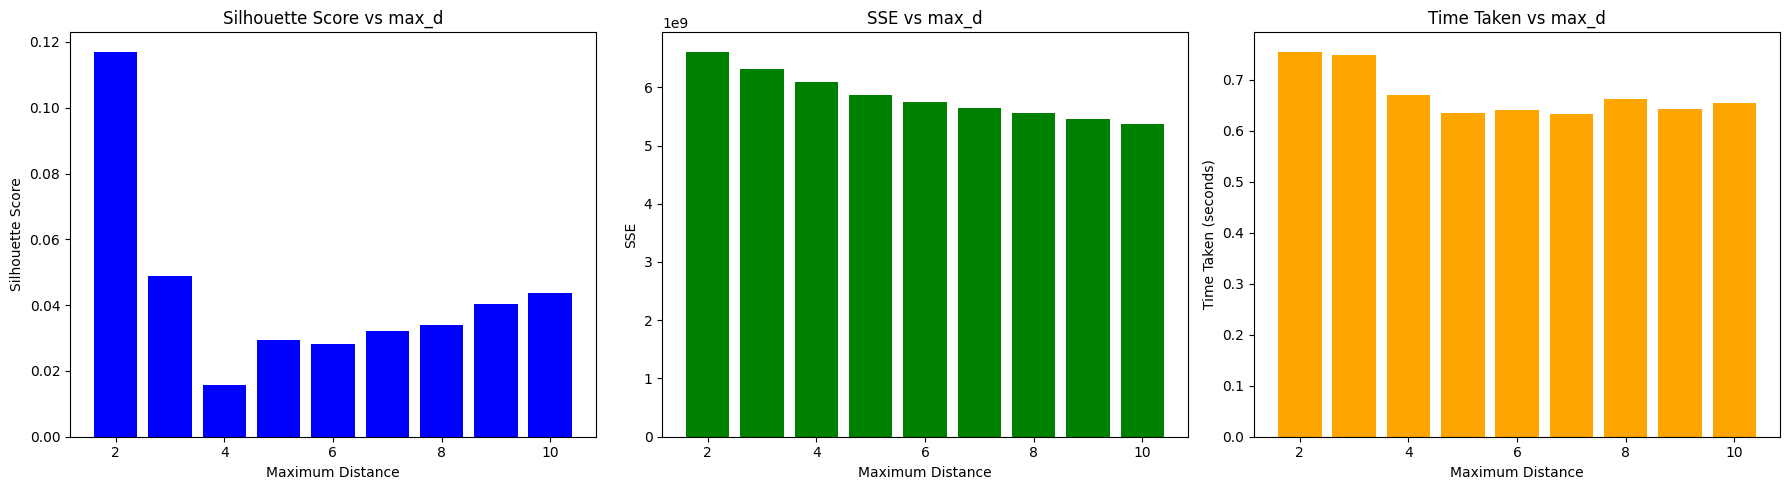

In [158]:
# Calculate metrics for clusters 1 to 10
max_d = 10
silhouette_scores, sse_values, times_taken = calculate_metrics_for_clusters(X_subset_mnist, max_d, 'sklearn_hierarchical')

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(range(2, max_d + 1), silhouette_scores, color='blue')
axes[0].set_title('Silhouette Score vs max_d')
axes[0].set_xlabel('Maximum Distance')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(range(2, max_d + 1), sse_values, color='green')
axes[1].set_title('SSE vs max_d')
axes[1].set_xlabel('Maximum Distance')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(range(2, max_d + 1), times_taken, color='orange')
axes[2].set_title('Time Taken vs max_d')
axes[2].set_xlabel('Maximum Distance')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()

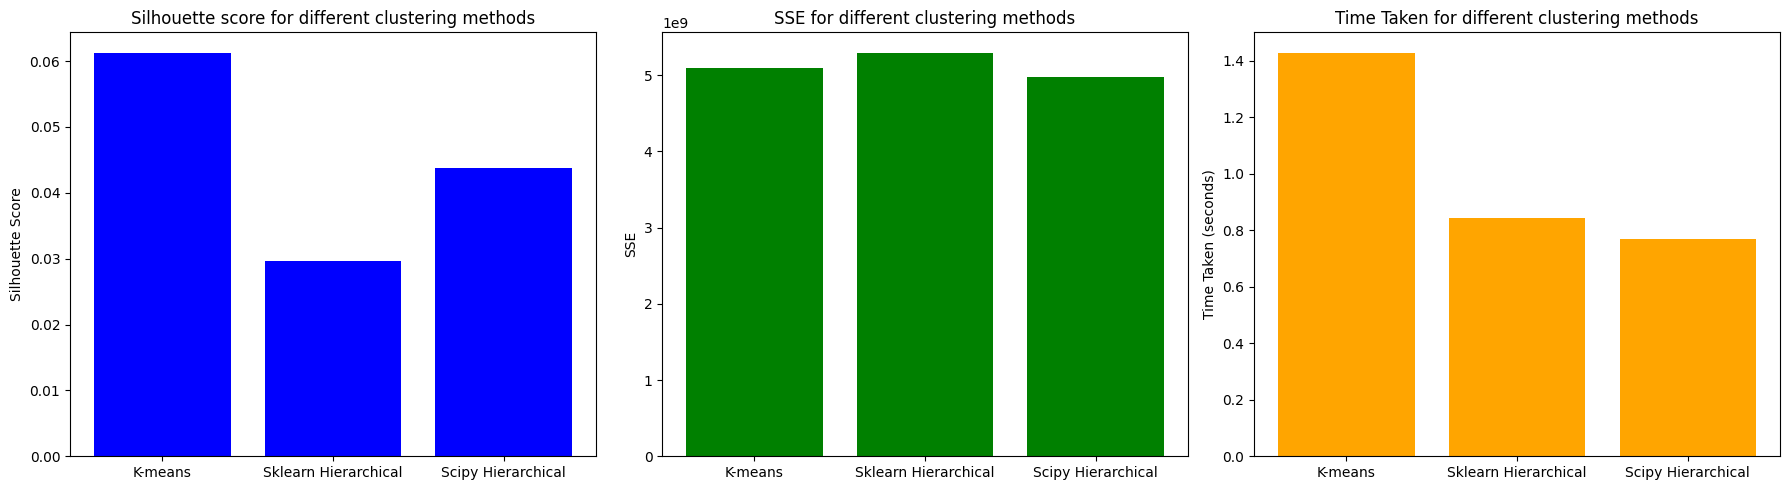

In [147]:
silhouette_all = [0.061299302240832465, 0.02959362287028824, 0.043720380167709905]
sse_all = [5093778833.336929, 5298373568.318553, 4971779264.922851]
time_all = [1.429243564605713, 0.8439462184906006, 0.7685716152191162]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods = ["K-means", "Sklearn Hierarchical", "Scipy Hierarchical"]
# Silhouette Score
axes[0].bar(methods, silhouette_all, color='blue')
axes[0].set_title('Silhouette score for different clustering methods')
axes[0].set_ylabel('Silhouette Score')

# Sum Squared Error (SSE)
axes[1].bar(methods, sse_all, color='green')
axes[1].set_title('SSE for different clustering methods')
axes[1].set_ylabel('SSE')

# Time taken
axes[2].bar(methods, time_all, color='orange')
axes[2].set_title('Time Taken for different clustering methods')
axes[2].set_ylabel('Time Taken (seconds)')

plt.tight_layout()
plt.show()